# $\color{purple}{\text{TP NOTE : Jeu de la vie}}$

In [193]:
import matplotlib.animation as animation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [194]:
import random
from matplotlib import animation
import utils

**Question 1** : Nous allons tout d'abord créer une chaine de caractère.

In [3]:
filename = "HMMA238_TP_opheliecoiffier.ipynb"

**Question 2** : Comptons le nombre de caractères dans filename.

In [4]:
for i in range(len(filename)):
    i = i+1
taille_str = i
print(taille_str)

32


**Question 3** : Création de la variable ma_graine qui correspond au reste de la division euclidienne de taille_str par 6.

In [5]:
ma_graine = taille_str%6
print(ma_graine)

2


**Question 4** : Nous allons calculer le nombre de voisins de chaque case sans numpy pour une liste z donnée.

In [6]:
#voici la fonction qui permet de calculer le nombre de voisins des cases.
#N[x][y] comptabilise le nombre de 1 tout autour de la case [x,y] (soit un carré 3x3)
#forme prend la longueur du grand tableau z, puis la longueur du premier petit tableau qui constitue z.


def calcul_nb_voisins(z):
    forme = len(z), len(z[0])
    N = [[0,]*(forme[0]) for i in range(forme[1])]
    for x in range (1,forme[1]-1):
        for y in range(1, forme[1]-1):
            N[x][y]=z[x-1][y-1]+z[x][y-1]+z[x+1][y-1]+z[x-1][y]+0\
                    +z[x+1][y]+z[x-1][y+1]+z[x][y+1]+z[x+1][y+1]
    return(N)

#voici la liste
z = [[0,0,0,0,0,0],[0,0,0,1,0,0],[0,1,0,1,0,0],
     [0,0,1,1,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]
#appliquons-la à la fonction
print(calcul_nb_voisins(z))

[[0, 0, 0, 0, 0, 0], [0, 1, 3, 1, 2, 0], [0, 1, 5, 3, 3, 0], [0, 2, 3, 2, 2, 0], [0, 1, 2, 2, 1, 0], [0, 0, 0, 0, 0, 0]]


En sortie, nous obtenons une liste de liste comportant le nombre de voisin pour chaque case du jeu.

Maintenant, étudions le fonction ci-dessous.

In [8]:
def iteration_jeu(z):
    """"Cette fonction met la case du jeu en 0 ou 1.
Autrement dit, elle indique si la case est vivante ou morte
une fois les conditions du jeu données dans l'énoncé appliquées:
    Naissance(elif dans la fonction), Equilibre(automatiquement appliquée),
    Etouffement et Isolement(if dans la fonction)
La règle Equilibre est automatique,
la nature de la case ne change pas quoi qu'il arrive.
Elle prend en entrée un tableau et elle retourne un tableau.
    """
    forme = len(z),len(z[0])
    N = calcul_nb_voisins(z)
    for x in range(1,forme[0]-1):
        for y in range(1,forme[1]-1):
            if z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3) :
                z[x][y] = 0
            elif z[x][y] == 0 and N[x][y] == 3 :
                z[x][y] = 1
    return(z)

z = [[0,0,0,0,0,0],[0,0,0,1,0,0],[0,1,0,1,0,0],
     [0,0,1,1,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]
print(iteration_jeu(z))

[[0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 1, 0], [0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]


**Question 5** : Dans la question précédente, nous n'avons appliquer les consignes du jeu une seule fois. Essayons de le faire tourner sur 10 itérations (de 0 à 9).

In [202]:
z = [[0,0,0,0,0,0],[0,0,0,1,0,0],[0,1,0,1,0,0],
     [0,0,1,1,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]
tab = list()
for i in range (10) :
    print("itération " + str(i))
    print(np.matrix(z))  #tableaux explicitant les cellules vivantes ou mortes.
utils.affichage(iteration_jeu, z)

itération 0
[[0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 1 0 1 0 0]
 [0 0 1 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
itération 1
[[0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 1 0 1 0 0]
 [0 0 1 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
itération 2
[[0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 1 0 1 0 0]
 [0 0 1 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
itération 3
[[0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 1 0 1 0 0]
 [0 0 1 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
itération 4
[[0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 1 0 1 0 0]
 [0 0 1 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
itération 5
[[0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 1 0 1 0 0]
 [0 0 1 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
itération 6
[[0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 1 0 1 0 0]
 [0 0 1 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
itération 7
[[0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 1 0 1 0 0]
 [0 0 1 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
itération 8
[[0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 1 0 1 0 0]
 [0 0 1 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
itération 9
[[0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 1 0 1 0 0]
 [0 0 1 1 0 0]
 

NameError: name 'plt' is not defined

**Question 6** : Nous pouvons remarquer qu'entre l'itération 0 et l'itération 3, il y a des changements dans les tableaux paires et impaires.la différence entre la figure paire et impaire est le décalage d'un "carré" jaune située à droite de la figure paire et qui passe à gauche sur la figure des itérations impaires. Nous le remarquons par la valeur 1 placée à la 5ème colonne / 3ème ligne du tableau des itérations paires et qui repassent colonne 3 / ligne 4 dans le tableau des itérations impaires. En revenche, la figure des itérations paires, tout comme celle des itérations impaires, réalise une symétrie axiale (d'axe : diagonale en partant du sommet haut gauche du carré) puis un décalage d'une case vers la droite(Ou alors une rotation de 90° par rapport au centre du carré, puis une symétrie axiale d'axe vertiacale : |). 

Puis à l'itération 4, nous remarquons que la figure est transformé de la même façon que précédement (rotation de 90° puis symétrie verticale) mais que nous pouvons prendre la figure représentant aussi bien les itérations impaires que paires.

Enfin, après l'itération 7, les sorties ne changent plus. Il y a toujours le même tableau soit `[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 0], [0, 0, 0, 1, 1, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]`, nous donnant ainsi la même figure. 

**Question 7** : Etudions les valeurs ci-dessous.

In [10]:
vect = np.array([0,1,0,0,1,1]) #vect est un tableau de taille 1*6
nb_vect = np.zeros(vect.shape) #même taille que vect mais remplit de 0
nb_vect[1:-1] += (vect[:-2] + vect[2:])
#remplace les valeurs numéro 1 à 4 du vecteur nb_vect par
#la somme des valeurs des vecteurs vect[:-2] et vect[2:]
#où vect[:-2] = [0,1,0,0] et vect[2:] = [0,0,1,1]
print(nb_vect)

[0. 0. 1. 1. 1. 0.]


**Question 8** : Nous allons appliquer cette méthode afin de créer une fonction calculant le nombre de voisins de chaque case du jeu.

In [11]:
def calcul_nb_voisins_np(z):
    voisin = np.zeros(z.shape)  #matrice de même taille que z avec que des 0.
    for i in range (1,len(z)-1): #on compte le nombre de voisins de chaque case
        for j in range (1,len(z)-1) :
            voisin [i][j:j+1] += z[i-1][j+1:j+2]+z[i][j+1:j+2]+z[i+1][j+1:j+2]\
                                +z[i+1][j:j+1]+z[i+1][j-1:j]+z[i][j-1:j]\
                                +z[i-1][j-1:j]+z[i-1][j:j+1]
    return (voisin)

z = [[0,0,0,0,0,0],[0,0,0,1,0,0],[0,1,0,1,0,0],
     [0,0,1,1,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]
print(calcul_nb_voisins_np(np.array(z)))

[[0. 0. 0. 0. 0. 0.]
 [0. 1. 3. 1. 2. 0.]
 [0. 1. 5. 3. 3. 0.]
 [0. 2. 3. 2. 2. 0.]
 [0. 1. 2. 2. 1. 0.]
 [0. 0. 0. 0. 0. 0.]]


**Question 9** : Nous allons ensuite, créer une fonction qui permet de faire fonctionner le jeu plusieurs fois de suite. Anisi, il nous suffit d'appliquer les règles du jeu données en consigne, le nombre de tour voulu.

In [12]:
#la règle Equilibre est automatique.
#Elle ne change pas l'aspect (morte ou vivante) de la case.


def iteration_jeu_np (tableau):
    N = calcul_nb_voisins_np(tableau) #matrice du nbre de voisins/case
    for x in range (1, np.shape(tableau)[0]-1):
        for y in range (1, np.shape(tableau)[1]-1):
            if tableau[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
               #on applique les règles Isolement et Etouffement ci dessus
                tableau[x][y] = 0
            elif tableau[x][y] == 0 and N[x][y] == 3 :
                #on applique la règle Naissance ci-dessus
                tableau[x][y] = 1
    return(tableau)

In [13]:
z = [[0,0,0,0,0,0],[0,0,0,1,0,0],[0,1,0,1,0,0]
    ,[0,0,1,1,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]
tableau = np.array(z)
print(iteration_jeu_np(tableau))

[[0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 1 0]
 [0 0 1 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


**Question 10** : Une fois que nous avons codé les différentes étapes du jeu pour une liste z connue, nous pouvons jouer. Ecrivons une fonction qui permet de jouer au jeu de la vie avec n'importe quelle liste en entrée et un nombre d'itérations choisi au moment de jouer.

In [39]:
def jeu_np(Z_in, nb_iter):
    """On itère "nb_iter" de fois la fonction précèdente
    afin de faire fonctionner le jeu.
    """
    jeu_de_la_vie = np.zeros(Z_in.shape)  #prend la taille de Z_in
    for i in range(1, nb_iter+1):
        jeu_de_la_vie = iteration_jeu_np(Z_in)
    return(jeu_de_la_vie)

In [40]:
#on choisit Z_in et nb_iter comme on le souhaite.
Z_in = np.array([[0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0], 
                 [0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]])
nb_iter = 6
#affiche la grille finale des cases vivantes et mortes
# au bout de nb_iter itérations.
print(jeu_np(Z_in, nb_iter))

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]]


**Question 11** : Il serait encore mieux de jouer, non plus avec des matrices mathématiques, mais de voir les itérations du jeu et d'obtenir notre damier final.

In [41]:
Z_huge = np.zeros((100, 100))   #création de la matrice géante de base
Z_np = np.array(
    [[0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]])
Z_huge[10:16, 10:16] = Z_np
#nous insérons la matrice de taille (6*6) dans la matrice géante
#(matrice 6*6 que nous avons utiliser au questions précédentes)

print(Z_huge[5:18, 5:18])   #verification : Z_np bien insérée dans Z_huge

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [51]:
#création de la vidéo sous forme de fonction
#pour la réutiliser question suivante.


def video(matrice, jeu_np, iteration):
    carre = plt.matshow(matrice)

    def animate(frame):
        carre.set_array(jeu_np(np.array(matrice), frame))
        return carre
    anim = animation.FuncAnimation(plt.figure(), animate, frames=iteration)
    return(anim)

<IPython.core.display.Javascript object>


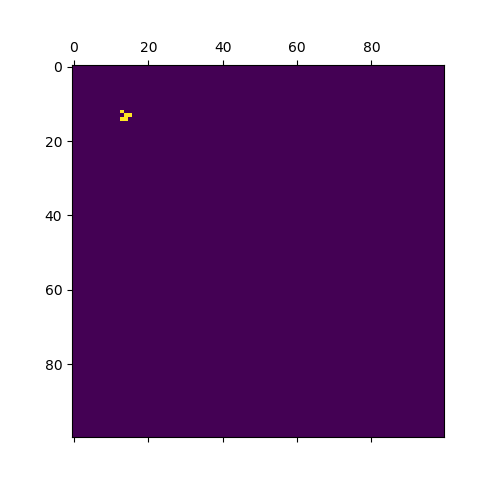

<IPython.core.display.Javascript object>


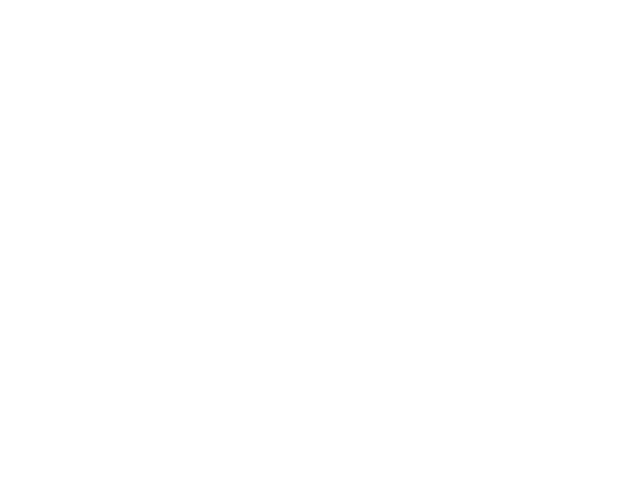

In [133]:
#création de la matrice géante de base
Z_huge = np.zeros((100, 100))
Z_np = np.array(
 [[0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0],
  [0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]])
Z_huge[10:16, 10:16] = Z_np

#mise en place de la vidéo figure 1
video(Z_huge, jeu_np, 100)

**Question 12** : Nous allons créer une matrice aléatoire de taille 100x100 remplie de 1 et de 0 dont la proportion de 1 est égale à `(1 + ma_graine) * 10 / 100`.

In [201]:
Z_huge = np.zeros((100, 100))  #initialisation de la matrice 
utils.nb_alea(ma_graine, Z_huge)
print(Z_huge[0:10, 0:10])  #pour vérifier sur une partie de la matrice
plt.matshow(Z_huge)  #affichage de la matrice sous forme de graphe

AttributeError: module 'utils' has no attribute 'nb_alea'

Appliquons maintenant la question précédente à cette matrice.

<IPython.core.display.Javascript object>


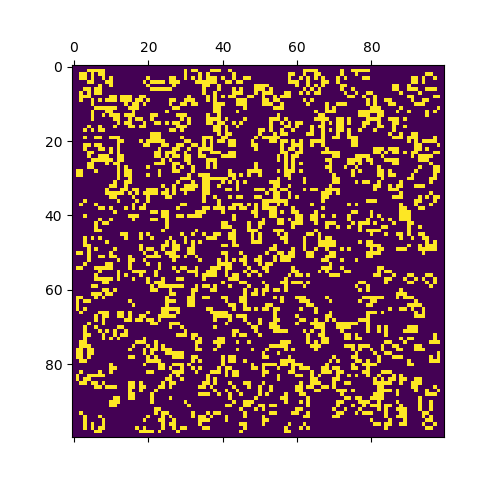

<IPython.core.display.Javascript object>


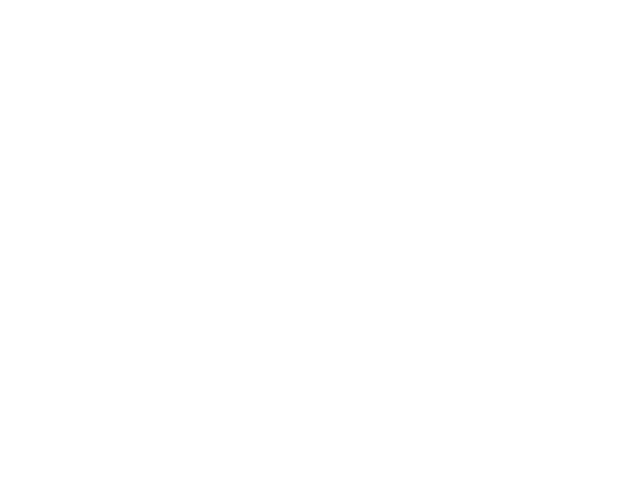

In [54]:
video(Z_huge, jeu_np, 100)

**Question 13** : Dans cette question, nous voulons remplir la matrice `Z_huge` de taille 100x100 par quatre matrices 50x50 :
    - une matrice d'un jeu dont l'état oscille de période 2
    - trois matrices simples (jeu fixe dans le temps) que l'on nommera respectivement 
`Z_stable_un`, `Z_stable_deux`, `Z_stable_trois`.

<IPython.core.display.Javascript object>


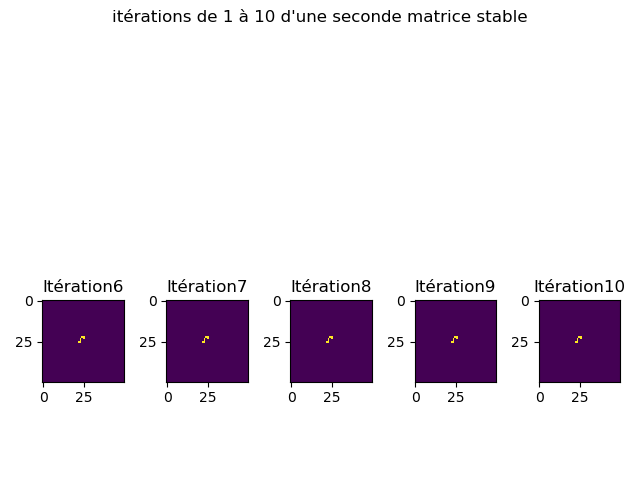

In [169]:
Z_periodique = np.zeros((50, 50))
for i in range(22, 23):
    Z_periodique[i, i+2] = 1
    Z_periodique[i+2, i] = 1
for i in range(4):
    Z_periodique[22+i, 25-i] = 1
tab = list()
for i in range(10): 
    plt.subplot(2, 5, i+1)  #afficher les figures sur 2 lignes/5 colonnes.
    matrice_bloc = iteration_jeu(Z_periodique)
    tab.append(matrice_bloc)  #on place les itérations dans notre liste
    plt.imshow(tab[i])  #affichage des figures
    plt.suptitle("itérations de 1 à 10 d'une matrice stable")
    plt.title("Itération" + str(i+1))

In [188]:
Z_stable_un = np.zeros((50, 50))
Z_stable_un[22,23] = 1
Z_stable_un[26,25] = 1
for i in range (23,26):
    Z_stable_un[i,i-1] = 1
    Z_stable_un[i,i+1] = 1
    
utils.affichage(iteration_jeu, Z_stable_un)
plt.suptitle("itérations de 1 à 10 d'une matrice stable")

NameError: name 'plt' is not defined

<IPython.core.display.Javascript object>


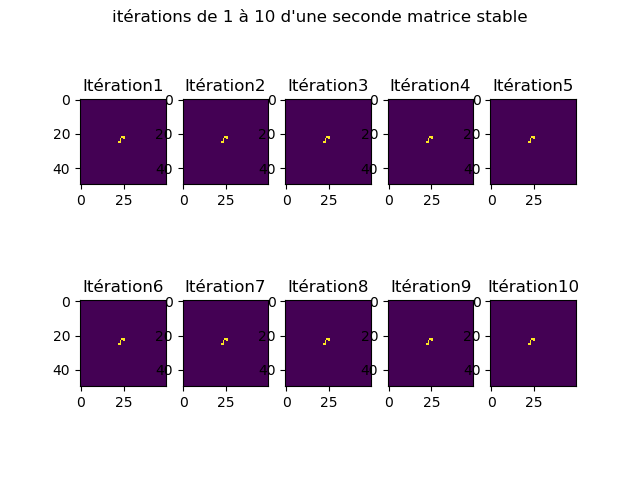

In [186]:
Z_stable_deux = np.zeros((50, 50))
for i in range(23,26):
    Z_stable_deux[i,23] = 1
Z_stable_deux[25,22] = 1
for j in range(21,23):
    Z_stable_deux[22,j+3] = 1
    Z_stable_deux[j+1,25] = 1

tab = list()
for i in range (10) : 
    plt.subplot(2,5,i+1)  #afficher les figures sur 2 lignes/5 colonnes.
    matrice_bloc = iteration_jeu(Z_stable_deux)
    tab.append(matrice_bloc)  #on place les itérations dans notre liste pour pouvoir l'afficher
    plt.imshow(tab[i])  #affichage des figures
    plt.suptitle("itérations de 1 à 10 d'une seconde matrice stable") 
    plt.title("Itération" + str(i+1))

<IPython.core.display.Javascript object>


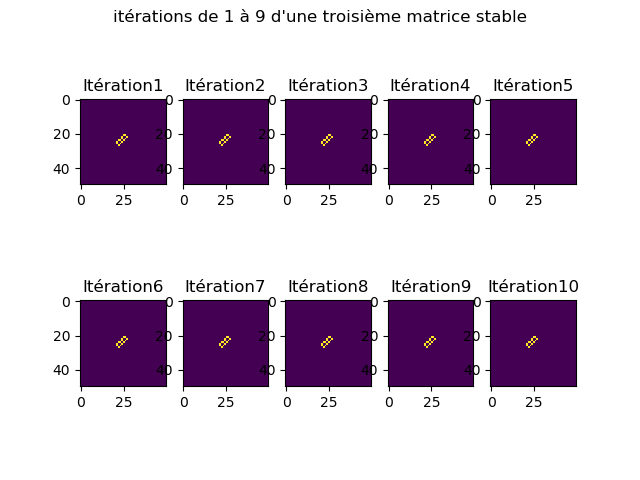

In [135]:
Z_stable_trois = np.zeros((50, 50))
for i in range(6):
    Z_stable_trois[22+i,27-i] = 1
for i in range(22,24):
    Z_stable_trois[i,24] = 1
    Z_stable_trois[i+3,21] = 1
    Z_stable_trois[24,i] = 1
    Z_stable_trois[21,i+3] = 1

tab = list()
for i in range (10) : 
    plt.subplot(2,5,i+1)  #afficher les figures sur 2 lignes/5 colonnes.
    matrice_bloc = iteration_jeu(Z_stable_trois)
    tab.append(matrice_bloc)#on place les itérations dans notre liste pour
    plt.imshow(tab[i]) #affichage des figures
    plt.suptitle("itérations de 1 à 10 d'une troisième matrice stable") 
    plt.title("Itération" + str(i+1))


**Question 14** : Nous allons reprendre les questions précédentes mais cette fois-ci, en utilisant une classe que l'on nommera "JeuDeLaVie".

In [128]:
class JeuDeLaVie :
    n_1 = 6
    n_2 = 6
    init_state = np.ndarray(shape = (n_1,n_2))
    (n_1, n_2) = init_state.shape 
    _time_T = 3
    _historic_state = np.ndarray(shape = (n_1, n_2, _time_T + 1)
    average_life = np.zeros((n_1,n_2))
    
    def __init__(self,init_state,_time_T):
        self._historic_state[:, :, 0] = self.init_state
        
    def play(self,_time_T,_historic_state) :
        for t in range (_time_T):
            _historic_state[:, :, t] = jeu_np(init_state,t)
        return(_historic_state)
    
    def affichage(self,n_1, n_2, _time_T, _historic_state) :
        somme = 0
        for i in range (n_1-1):
            for j in range (n_2-1):
                for t in range (_time_T):
                    somme = _historic_state[i,j,t] + somme
                average_life[i,j] = somme/_time_T
        plt.plot(average_life)
        plt.colorbar()

z = [[0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0], [0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]        
JeuDeLaVie(init_state=z,_time_T=3)

SyntaxError: invalid syntax (<ipython-input-128-1a0b346429f2>, line 8)